Fitting 10 folds for each of 48 candidates, totalling 480 fits
Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
Melhor score: 0.6816924664602684
Acurácia no teste: 0.6986754966887417
Erro de Treino (Acurácia): 0.9263, Erro de Treino (Erro): 0.0737
Erro de Teste (Acurácia): 0.6987, Erro de Teste (Erro): 0.3013
Erro de Treino (MAE): 0.0737
Erro de Teste (MAE): 0.3013
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       172
           1       0.75      0.45      0.56       130

    accuracy                           0.70       302
   macro avg       0.72      0.67      0.67       302
weighted avg       0.71      0.70      0.68       302

Matriz de Confusão:
[[153  19]
 [ 72  58]]


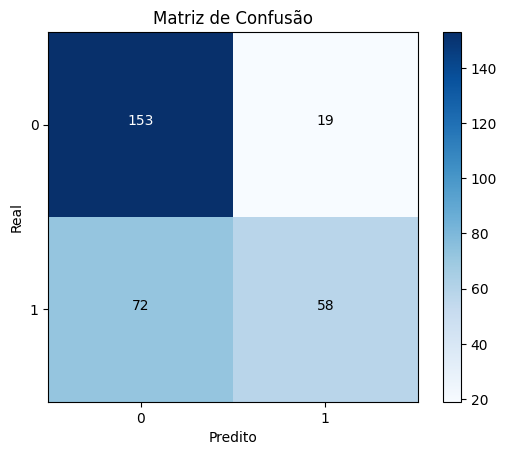

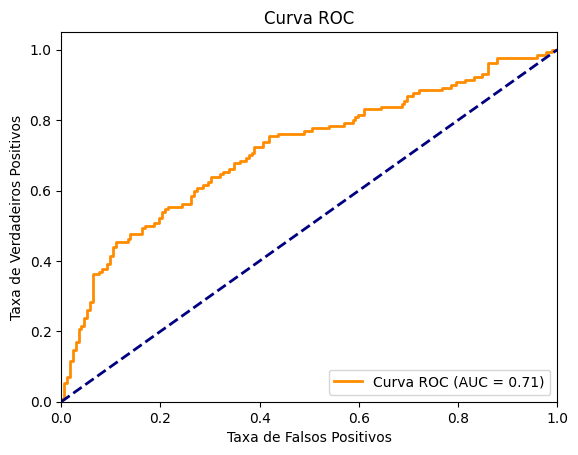

Pesos das variáveis:
ph: 0.15969075675013836
Hardness: 0.11742459487678117
Solids: 0.11310919200828524
Chloramines: 0.11755157822978275
Sulfate: 0.16973979976657258
Conductivity: 0.0897888309072028
Organic_carbon: 0.07939189017548116
Trihalomethanes: 0.08175382409729999
Turbidity: 0.07154953318845587


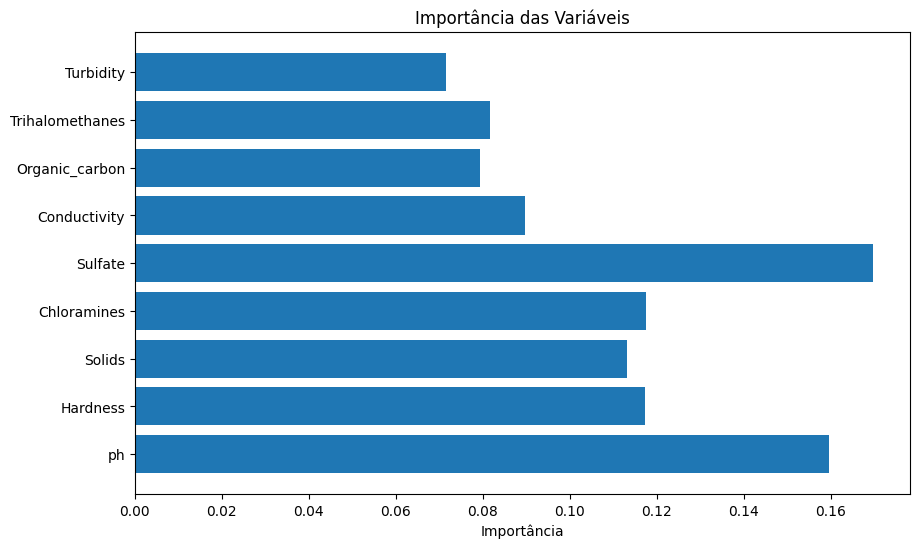

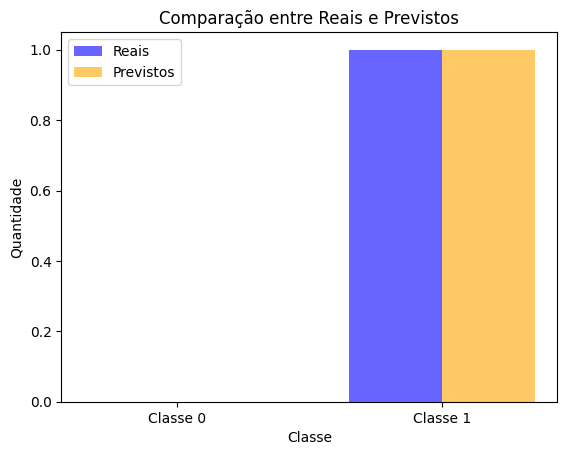

In [79]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# ======== BAGGING RANDOM FOREST ====================================

# ======== LENDO E SEPARANDO DATASET ================================

# lendo dataset
df = pd.read_csv('../water_potability.csv').dropna()

X = df.drop('Potability', axis=1) 
Y = df['Potability']  

# separando em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, shuffle=True)

# ======== CRIANDO E TREINANDO MODELO ================================

rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
# Melhor score: 0.6811007911936704
# Acurácia no teste: 0.7185430463576159
# Erro de Treino (Acurácia): 0.9269, Erro de Treino (Erro): 0.0731
# Erro de Teste (Acurácia): 0.7185, Erro de Teste (Erro): 0.2815

#  Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
# Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
# Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
# Melhores parâmetros: {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 150} # mmt bom
# elhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}

param_grid = {
    'max_depth': [10, 15, 17],
    'min_samples_split': [15, 20, 22, 25],
    'min_samples_leaf': [2],
    'n_estimators': [100, 150, 170, 200]
}

model = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Treinar
model.fit(X_train, y_train)

# # Criar o modelo Random Forest
# model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12, min_samples_split=22)
# model.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print("Melhores parâmetros:", model.best_params_)
print("Melhor score:", model.best_score_)

# Testar no conjunto de teste
best_model = model.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Acurácia no teste:", test_score)


# imports adicionais
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ========================== CALCULANDO PREVISÃO =============================

# Fazer previsões no conjunto de teste
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# ========================== CALCULANDO PRECISÃO =============================

# Calcular a acurácia no treino
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_error = 1 - train_accuracy

# Calcular a acurácia no teste
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy

# Calcular o erro absoluto médio (MAE)
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, y_test_pred)

# ========================== METRICAS =============================

# Imprimir os resultados
print(f"Erro de Treino (Acurácia): {train_accuracy:.4f}, Erro de Treino (Erro): {train_error:.4f}")
print(f"Erro de Teste (Acurácia): {test_accuracy:.4f}, Erro de Teste (Erro): {test_error:.4f}")
print(f"Erro de Treino (MAE): {train_mae:.4f}")
print(f"Erro de Teste (MAE): {test_mae:.4f}")

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_test_pred))

# ========================== MATRIZ DE CONFUSÃO =============================

# Exibir a Matriz de Confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Visualizar a matriz de confusão com um gráfico
fig, ax = plt.subplots()
cax = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Predito')
ax.set_ylabel('Real')

# Adicionar as contagens na matriz
classes = [0, 1]  # classes 0 e 1
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Adicionar os valores nas células da matriz
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j]), 
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > thresh else "black")

# Passar o 'mappable' para a criação do colorbar
fig.colorbar(cax)

plt.show()

# ========================== CURVA ROC =============================

# Binarizar as classes (caso tenha mais de 2)
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# ========================== IMPORTÂNCIA DAS FEATURES =============================

# Exibir a importância das variáveis
importances = model.best_estimator_.feature_importances_

# Exibir as características mais importantes
print("Pesos das variáveis:")
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

# Visualizar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importância')
plt.title('Importância das Variáveis')
plt.show()

#  ========================================================================= /// ==============================================================

cont_quantos_nos_reais = dict(zip(valoresDifExistentes, cont_quantos_nos_reais))
cont_quantos_na_prev = dict(zip(_, cont_quantos_na_prev))

# Garantir que ambos os conjuntos de dados tenham as mesmas chaves (0 e 1)
# Isso é necessário caso um valor de classe (0 ou 1) esteja ausente

"""
    O método get(0, 0) está tentando acessar o valor associado à chave 0.
    Se a chave 0 existir, ele retorna o valor associado a essa chave.
    Se a chave 0 não existir no dicionário (o que pode ocorrer se, por exemplo, não houver valores reais 0), ele retorna o valor 0 (o segundo argumento de get). 
"""
cont_quantos_nos_reais = {0: cont_quantos_nos_reais.get(0, 0), 1: cont_quantos_nos_reais.get(1, 0)}
cont_quantos_na_prev = {0: cont_quantos_na_prev.get(0, 0), 1: cont_quantos_na_prev.get(1, 0)}

# Plotando o gráfico
bar_width = 0.35  # Largura das barras
index = np.arange(2)  # Existem 2 classes: 0 e 1

# Plotando as barras para valores reais e previstos
plt.bar(index, list(cont_quantos_nos_reais.values()), bar_width, color='blue', alpha=0.6, label="Reais")
plt.bar(index + bar_width, list(cont_quantos_na_prev.values()), bar_width, color='orange', alpha=0.6, label="Previstos")
# list(cont_quantos_na_prev.values())  # Retorna [150, 253], por exemplo

# Ajustando o gráfico
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.title("Comparação entre Reais e Previstos")
plt.xticks(index + bar_width / 2, ['Classe 0', 'Classe 1'])
plt.legend()

plt.show()



Fitting 10 folds for each of 48 candidates, totalling 480 fits
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
Melhor score: 0.6834399724802201
Acurácia no teste: 0.7218543046357616
Erro de Treino (Acurácia): 0.8297, Erro de Treino (Erro): 0.1703
Erro de Teste (Acurácia): 0.7219, Erro de Teste (Erro): 0.2781
Erro de Treino (MAE): 0.1703
Erro de Teste (MAE): 0.2781
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       188
           1       0.75      0.39      0.52       114

    accuracy                           0.72       302
   macro avg       0.73      0.66      0.66       302
weighted avg       0.73      0.72      0.70       302

Matriz de Confusão:
[[173  15]
 [ 69  45]]


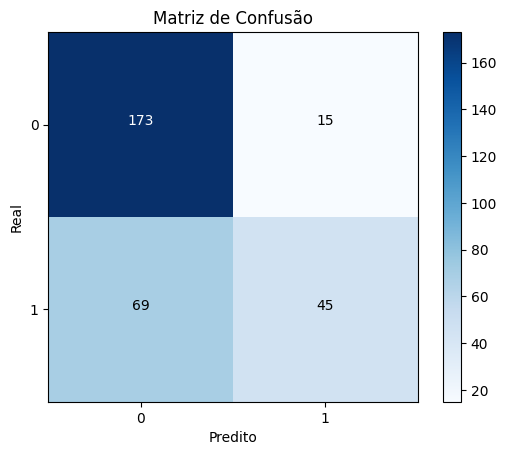

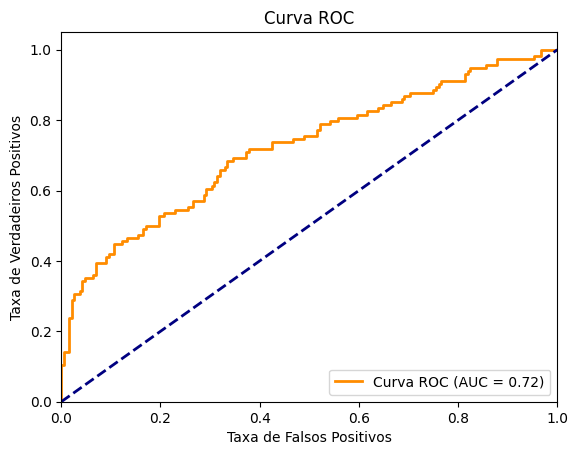

Pesos das variáveis:
ph: 0.17559149559710324
Hardness: 0.12594593514216298
Solids: 0.10044859916259428
Chloramines: 0.12982059066926033
Sulfate: 0.1854328005746418
Conductivity: 0.07800569094009635
Organic_carbon: 0.0698199113971221
Trihalomethanes: 0.07572331907497222
Turbidity: 0.05921165744204683


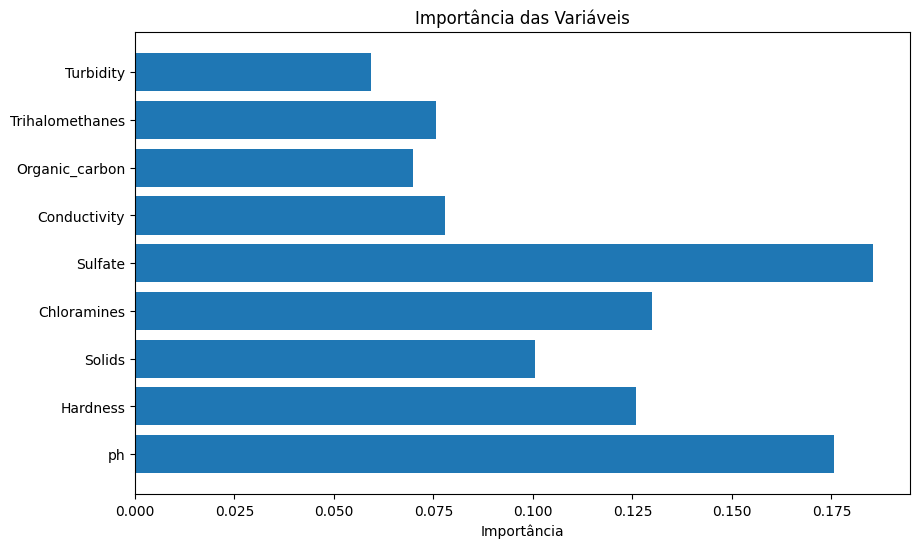

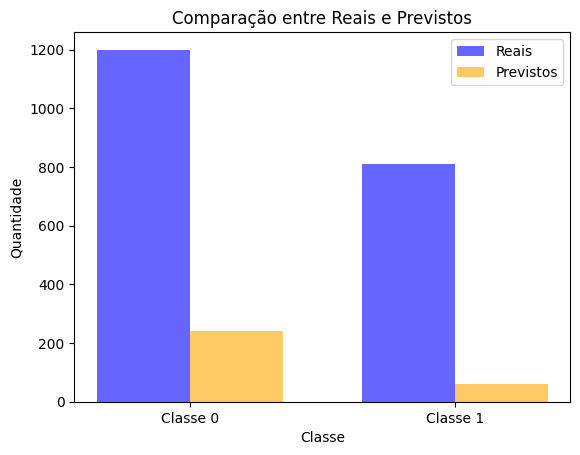

In [81]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# ======== BAGGING RANDOM FOREST ====================================

# ======== LENDO E SEPARANDO DATASET ================================

# lendo dataset
df = pd.read_csv('../water_potability.csv').dropna()

X = df.drop('Potability', axis=1) 
Y = df['Potability']  

# separando em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, shuffle=True)

# ======== CRIANDO E TREINANDO MODELO ================================

rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
# Melhor score: 0.6811007911936704
# Acurácia no teste: 0.7185430463576159
# Erro de Treino (Acurácia): 0.9269, Erro de Treino (Erro): 0.0731
# Erro de Teste (Acurácia): 0.7185, Erro de Teste (Erro): 0.2815

#  Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
# Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
# Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
# Melhores parâmetros: {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 150} # mmt bom
# elhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}

param_grid = {
    'max_depth': [10, 15, 17],
    'min_samples_split': [15, 20, 22, 25],
    'min_samples_leaf': [2],
    'n_estimators': [100, 150, 170, 200]
}

model = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Treinar
model.fit(X_train, y_train)

# # Criar o modelo Random Forest
# model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12, min_samples_split=22)
# model.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print("Melhores parâmetros:", model.best_params_)
print("Melhor score:", model.best_score_)

# Testar no conjunto de teste
best_model = model.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Acurácia no teste:", test_score)


# imports adicionais
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ========================== CALCULANDO PREVISÃO =============================

# Fazer previsões no conjunto de teste
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# ========================== CALCULANDO PRECISÃO =============================

# Calcular a acurácia no treino
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_error = 1 - train_accuracy

# Calcular a acurácia no teste
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy

# Calcular o erro absoluto médio (MAE)
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, y_test_pred)

# ========================== METRICAS =============================

# Imprimir os resultados
print(f"Erro de Treino (Acurácia): {train_accuracy:.4f}, Erro de Treino (Erro): {train_error:.4f}")
print(f"Erro de Teste (Acurácia): {test_accuracy:.4f}, Erro de Teste (Erro): {test_error:.4f}")
print(f"Erro de Treino (MAE): {train_mae:.4f}")
print(f"Erro de Teste (MAE): {test_mae:.4f}")

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_test_pred))

# ========================== MATRIZ DE CONFUSÃO =============================

# Exibir a Matriz de Confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Visualizar a matriz de confusão com um gráfico
fig, ax = plt.subplots()
cax = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Predito')
ax.set_ylabel('Real')

# Adicionar as contagens na matriz
classes = [0, 1]  # classes 0 e 1
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Adicionar os valores nas células da matriz
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j]), 
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > thresh else "black")

# Passar o 'mappable' para a criação do colorbar
fig.colorbar(cax)

plt.show()

# ========================== CURVA ROC =============================

# Binarizar as classes (caso tenha mais de 2)
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# ========================== IMPORTÂNCIA DAS FEATURES =============================

# Exibir a importância das variáveis
importances = model.best_estimator_.feature_importances_

# Exibir as características mais importantes
print("Pesos das variáveis:")
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

# Visualizar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importância')
plt.title('Importância das Variáveis')
plt.show()

# ================================= // =======================================

valoresDifExistentes, cont_quantos_nos_reais = np.unique(Y, return_counts=True) # quantos valores de cada(0 e 1) existiram nos reais
_, cont_quantos_na_prev = np.unique(y_test_pred, return_counts=True) # quantos valores de cada(0 e 1) existiram nas previsões


""" 
    # var que nn será usada = _
    # Valores será: [0, 1] ou seja, tds os valores diferentes que tem em Y
    # Contagem será: [2, 4]  (O número de vezes que 0 aparece é 2 e que 1 aparece é 4)

    # Garantir que ambos os arrays de contagem têm o mesmo tamanho
    # Caso algum dos valores (0 ou 1) não apareça nos dados previstos ou reais, preenchemos com zero

    zip(valoresDifExistentes, cont_quantos_nos_reais):

    A função zip pega dois iteráveis (como listas, arrays ou outras sequências) e os combina em pares.
    Por exemplo, se valoresDifExistentes = [0, 1] e cont_quantos_nos_reais = [10, 20], a função zip irá combinar as duas listas em pares de forma que (0, 10) e (1, 20) se tornem os pares resultantes.

    Usando o exemplo acima, o zip vai gerar uma sequência de pares, e o dict vai transformá-los em um dicionário: {0: 10, 1: 20}.

"""

cont_quantos_nos_reais = dict(zip(valoresDifExistentes, cont_quantos_nos_reais))
cont_quantos_na_prev = dict(zip(_, cont_quantos_na_prev))

# Garantir que ambos os conjuntos de dados tenham as mesmas chaves (0 e 1)
# Isso é necessário caso um valor de classe (0 ou 1) esteja ausente

"""
    O método get(0, 0) está tentando acessar o valor associado à chave 0.
    Se a chave 0 existir, ele retorna o valor associado a essa chave.
    Se a chave 0 não existir no dicionário (o que pode ocorrer se, por exemplo, não houver valores reais 0), ele retorna o valor 0 (o segundo argumento de get). 
"""
cont_quantos_nos_reais = {0: cont_quantos_nos_reais.get(0, 0), 1: cont_quantos_nos_reais.get(1, 0)}
cont_quantos_na_prev = {0: cont_quantos_na_prev.get(0, 0), 1: cont_quantos_na_prev.get(1, 0)}

# Plotando o gráfico
bar_width = 0.35  # Largura das barras
index = np.arange(2)  # Existem 2 classes: 0 e 1

# Plotando as barras para valores reais e previstos
plt.bar(index, list(cont_quantos_nos_reais.values()), bar_width, color='blue', alpha=0.6, label="Reais")
plt.bar(index + bar_width, list(cont_quantos_na_prev.values()), bar_width, color='orange', alpha=0.6, label="Previstos")
# list(cont_quantos_na_prev.values())  # Retorna [150, 253], por exemplo

# Ajustando o gráfico
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.title("Comparação entre Reais e Previstos")
plt.xticks(index + bar_width / 2, ['Classe 0', 'Classe 1'])
plt.legend()

# # plt.show()



In [ ]:

# # ========================== CALCULANDO PREVISÃO  =============================

# # Fazer previsões no conjunto de teste
# # y_predTest = model.predict(X_test)

# # Fazer previsões no conjunto de treino
# y_train_pred = model.predict(X_train)

# # ========================== CALCULANDO PRECISÃO  =============================

# # Calcular a acurácia no treino (erro de treino)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_error = 1 - train_accuracy  # Erro de treino (quanto menor, melhor)

# y_test_pred = model.predict(X_test)
# y_test_proba = model.predict_proba(X_test)[:, 1]
# threshold = 0.4
# y_test_pred = (y_test_proba >= threshold).astype(int)

# # Calcular a acurácia no teste (erro de teste)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_error = 1 - test_accuracy  # Erro de teste (quanto menor, melhor)

# # Fazer previsões no conjunto de teste

# # Opcional: calcular o erro absoluto médio (MAE) no treino e teste
# train_mae = mean_absolute_error(y_train, y_train_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)


# # ========================== CALCULANDO PREVISÃO  =============================
# # ================== RELATÓRIO DE CLASSIFICAÇÃO RESUMO EXEMPLOS =====================

# """
#         precision    recall  f1-score   support

#     0       0.65      0.84      0.73       231
#     1       0.65      0.40      0.50       172 

# - precision 0.65 significa que 65% das vezes que previu 0 estava correto
# - recall: indica a porcentagem de exemplos da classe real que o modelo conseguiu identificar corretamente. Ou seja, dos exemplos que realmente pertencem a uma classe, quantos o modelo foi capaz de prever corretamente.

#     Para a classe 0, o recall é 0.84, ou seja, 84% dos exemplos não potáveis foram identificados corretamente pelo modelo.
#     Para a classe 1, o recall é 0.40, ou seja, o modelo conseguiu identificar corretamente apenas 40% dos exemplos potáveis.

# -  F1-score: Para a classe 0, o F1-score é 0.73, o que reflete um bom equilíbrio entre precisão e recall.
# Para a classe 1, o F1-score é 0.50, o que indica que o modelo tem um desempenho pior na classe 1 (potável), já que o recall é baixo.

# - O support representa o número de ocorrências reais de cada classe no conjunto de dados.

#     Para a classe 0 (não potável), há 231 exemplos.
#     Para a classe 1 (potável), há 172 exemplos.

# ========== RESULTADOS =================

#     Pontuação média da validação cruzada: 0.6405
#     Erro de Treino (Acurácia): 1.0000, Erro de Treino (Erro): 0.0000
#     Erro de Teste (Acurácia): 0.6526, Erro de Teste (Erro): 0.3474
#     Erro de Treino (MAE): 0.0000
#     Erro de Teste (MAE): 0.3474
#     Acurácia: 0.652605459057072

#     Matriz de Confusão:

#             predito 0 | predito 1
#     real 0  [194(TN)       37(FP)]
#     real 1  [103(FN)       69(TP)]

#     Relatório de Classificação:
#                 precision    recall  f1-score   support

#             0       0.65      0.84      0.73       231
#             1       0.65      0.40      0.50       172
#     accuracy                            0.65       403
#     macro avg       0.65      0.62      0.62       403 (médias de cada)
#     weighted avg    0.65      0.65      0.63       403

#     ph: 0.1379387096568688
#     Hardness: 0.11741862970752964
#     Solids: 0.11459307067885648
#     Chloramines: 0.1136752351602551
#     Sulfate: 0.14369073482107933
#     Conductivity: 0.09203481756025772
#     Organic_carbon: 0.09260289344656661
#     Trihalomethanes: 0.09626490585536313
#     Turbidity: 0.09178100311322318

# - Accuracy (Acurácia): é a porcentagem de previsões corretas (tanto para classe 0 quanto para classe 1) sobre o total de exemplos.
#     A acurácia geral é 0.65, ou seja, 65% das previsões feitas pelo modelo estão corretas.

# """
# # ========================== RELATÓRIO DE CLASSIFICAÇÃO =============================

# # Exibir os resultados
# print(f"Erro de Treino (Acurácia): {train_accuracy:.4f}, Erro de Treino (Erro): {train_error:.4f}")
# print(f"Erro de Teste (Acurácia): {test_accuracy:.4f}, Erro de Teste (Erro): {test_error:.4f}")
# print(f"Erro de Treino (MAE): {train_mae:.4f}")
# print(f"Erro de Teste (MAE): {test_mae:.4f}")

# # Avaliar o modelo
# print("Acurácia:", accuracy_score(y_test, y_test_pred))

# # Matriz de confusão
# print("Matriz de Confusão:")
# print(confusion_matrix(y_test, y_test_pred))

# # Relatório de classificação
# print("Relatório de Classificação:")
# print(classification_report(y_test, y_test_pred))

# # Exibir a importância das variáveis
# importances = model.feature_importances_

# # Exibir as características mais importantes
# print("Pesos")
# for feature, importance in zip(X.columns, importances):
#     print(f'{feature}: {importance}')

# # ========================== PROCESSOS DE EXIBIÇÃO DOS GRÁFICOS =============================

# """ 
#     - em vez de  comparar com todo o conjunto de dados, ajustar o código para que ele use apenas os valores do y_test e y_test_pred para calcular as contagens e exibir o gráfico corretamente.        
# """

# # Contando quantos exemplos de cada classe (0 e 1) existem no conjunto de teste e nas previsões
# valores_reais, contagem_reais = np.unique(y_test, return_counts=True)
# valores_prev, contagem_prev = np.unique(y_test_pred, return_counts=True)

# # Criando dicionários para garantir que ambas as classes (0 e 1) estejam representadas
# contagem_reais_dict = {0: 0, 1: 0}
# contagem_prev_dict = {0: 0, 1: 0}

# # Atualizando os dicionários com os valores encontrados
# contagem_reais_dict.update(dict(zip(valores_reais, contagem_reais)))
# contagem_prev_dict.update(dict(zip(valores_prev, contagem_prev)))

# # Criando o gráfico
# bar_width = 0.35
# index = np.arange(2)

# plt.bar(index, list(contagem_reais_dict.values()), bar_width, color='blue', alpha=0.6, label="Reais")
# plt.bar(index + bar_width, list(contagem_prev_dict.values()), bar_width, color='orange', alpha=0.6, label="Previstos")

# plt.xlabel("Classe")
# plt.ylabel("Quantidade")
# plt.title("Comparação entre Reais e Previstos (Apenas Teste)")
# plt.xticks(index + bar_width / 2, ['Classe 0', 'Classe 1'])
# plt.legend()

# plt.show()




# # # Calculando as contagens dos valores reais e previstos
# # valoresDifExistentes, cont_quantos_nos_reais = np.unique(Y, return_counts=True) # quantos valores de cada(0 e 1) existiram nos reais
# # _, cont_quantos_na_prev = np.unique(y_test_pred, return_counts=True) # quantos valores de cada(0 e 1) existiram nas previsões


# # """ 
# #     # var que nn será usada = _
# #     # Valores será: [0, 1] ou seja, tds os valores diferentes que tem em Y
# #     # Contagem será: [2, 4]  (O número de vezes que 0 aparece é 2 e que 1 aparece é 4)

# #     # Garantir que ambos os arrays de contagem têm o mesmo tamanho
# #     # Caso algum dos valores (0 ou 1) não apareça nos dados previstos ou reais, preenchemos com zero

# #     zip(valoresDifExistentes, cont_quantos_nos_reais):

# #     A função zip pega dois iteráveis (como listas, arrays ou outras sequências) e os combina em pares.
# #     Por exemplo, se valoresDifExistentes = [0, 1] e cont_quantos_nos_reais = [10, 20], a função zip irá combinar as duas listas em pares de forma que (0, 10) e (1, 20) se tornem os pares resultantes.

# #     Usando o exemplo acima, o zip vai gerar uma sequência de pares, e o dict vai transformá-los em um dicionário: {0: 10, 1: 20}.

# # """

# # cont_quantos_nos_reais = dict(zip(valoresDifExistentes, cont_quantos_nos_reais))
# # cont_quantos_na_prev = dict(zip(_, cont_quantos_na_prev))

# # # Garantir que ambos os conjuntos de dados tenham as mesmas chaves (0 e 1)
# # # Isso é necessário caso um valor de classe (0 ou 1) esteja ausente

# # """
# #     O método get(0, 0) está tentando acessar o valor associado à chave 0.
# #     Se a chave 0 existir, ele retorna o valor associado a essa chave.
# #     Se a chave 0 não existir no dicionário (o que pode ocorrer se, por exemplo, não houver valores reais 0), ele retorna o valor 0 (o segundo argumento de get). 
# # """
# # cont_quantos_nos_reais = {0: cont_quantos_nos_reais.get(0, 0), 1: cont_quantos_nos_reais.get(1, 0)}
# # cont_quantos_na_prev = {0: cont_quantos_na_prev.get(0, 0), 1: cont_quantos_na_prev.get(1, 0)}

# # # Plotando o gráfico
# # bar_width = 0.35  # Largura das barras
# # index = np.arange(2)  # Existem 2 classes: 0 e 1

# # # Plotando as barras para valores reais e previstos
# # plt.bar(index, list(cont_quantos_nos_reais.values()), bar_width, color='blue', alpha=0.6, label="Reais")
# # plt.bar(index + bar_width, list(cont_quantos_na_prev.values()), bar_width, color='orange', alpha=0.6, label="Previstos")
# # # list(cont_quantos_na_prev.values())  # Retorna [150, 253], por exemplo

# # # Ajustando o gráfico
# # plt.xlabel("Classe")
# # plt.ylabel("Quantidade")
# # plt.title("Comparação entre Reais e Previstos")
# # plt.xticks(index + bar_width / 2, ['Classe 0', 'Classe 1'])
# # plt.legend()

# # plt.show()

# """ 
# Pontuação média da validação cruzada: 0.6311
# Erro de Treino (Acurácia): 1.0000, Erro de Treino (Erro): 0.0000
# Erro de Teste (Acurácia): 0.6774, Erro de Teste (Erro): 0.3226
# Erro de Treino (MAE): 0.0000
# Erro de Teste (MAE): 0.3226
# Acurácia: 0.6774193548387096
# Matriz de Confusão:
# [[196  35]
#  [ 95  77]]
# Relatório de Classificação:
#               precision    recall  f1-score   support

#            0       0.67      0.85      0.75       231
#            1       0.69      0.45      0.54       172

#     accuracy                           0.68       403
#    macro avg       0.68      0.65      0.65       403
# weighted avg       0.68      0.68      0.66       403

# """


